In [2]:
import pandas as pd
import numpy as np
import glob
import os
from scipy import signal
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [3]:
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams["lines.linewidth"] = 0.5

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [10]:
def GetAllUsableData(data, v):
    visit = v
    df = pd.DataFrame([])
    for eachfile in data:
        n = os.path.basename(eachfile)
        name = n.split('_')[0] + '_' + n.split('_')[1]
        
        temp = pd.read_csv(eachfile)

        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [visit] * len(temp), name = 'visit')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
    df = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]
    return(df)

In [5]:
def FitGaussainKde(radialDist, RRO):
        m1 = radialDist
        m2 = RRO
        xmin = m1.min()
        xmax = m1.max()
        ymin = m2.min()
        ymax = m2.max()
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

        values = np.vstack([m1, m2])
        kernel = gaussian_kde(values)
        
        return(X,Y,kernel)

## plot the figure in its entirety

In [38]:
def accesorise(axes, tickY, tickX):
    axes.spines['left'].set_visible(True)
    axes.spines['bottom'].set_visible(True)
    axes.spines['right'].set_visible(True)
    axes.spines['top'].set_visible(True)

    if tickY:
        axes.set_yticks([0, 5, 10])
        axes.set_yticklabels([0, 5, 10])
    else:
        axes.set_yticks([])
        
    if tickX:
        axes.set_xticks([0, 1])
        axes.set_xticklabels([0, 1])
    else:
        axes.set_xticks([])

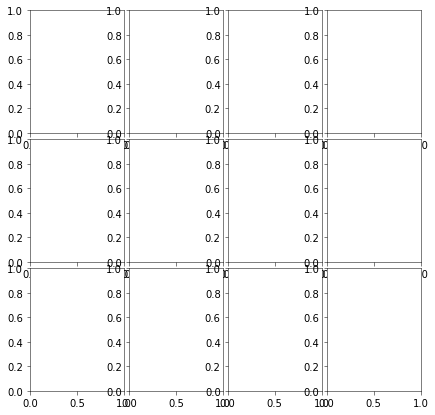

In [47]:
w = (7) # square-ish figure: 4 rows 4 columns - one column width for paper
# f1, ax1 = plt.subplots(3,4, figsize = (w,w), num = 'firstVisit')

# gridspec inside gridspec
f = plt.figure(figsize = (w,w))
gs0 = plt.GridSpec(3,4, figure=f, hspace = 0.05, wspace=0.05)

ax00 = f.add_subplot(gs0[0,0])
ax01 = f.add_subplot(gs0[0,1]
                     , sharex = ax00, sharey = ax00)
ax02 = f.add_subplot(gs0[0,2]
                     , sharex = ax00, sharey = ax00)
ax03 = f.add_subplot(gs0[0,3]
                     , sharex = ax00, sharey = ax00)

ax10 = f.add_subplot(gs0[1,0]
                     , sharex = ax00, sharey = ax00)
ax11 = f.add_subplot(gs0[1,1]
                     , sharex = ax00, sharey = ax10)
ax12 = f.add_subplot(gs0[1,2]
                     , sharex = ax00, sharey = ax10)
ax13 = f.add_subplot(gs0[1,3]
                     , sharex = ax00, sharey = ax10)

ax20 = f.add_subplot(gs0[2,0]
                     , sharex = ax00, sharey = ax00)
ax21 = f.add_subplot(gs0[2,1]
                     , sharex = ax00, sharey = ax20)
ax22 = f.add_subplot(gs0[2,2]
                     , sharex = ax00, sharey = ax20)
ax23 = f.add_subplot(gs0[2,3]
                     , sharex = ax00, sharey = ax20)

firstVisit = [ax00, ax01, ax02, ax03]
sevenVisit = [ax10, ax11, ax12, ax13]
twentyVisit = [ax20, ax21, ax22, ax23]

In [48]:
outpath = r"../dataFolders/PaperPipelineOutput/Figures/v3/Paper/"
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
visitnum = ['FirstVisit/','Later7thVisit/' , 'Later20thVisit/']
axes = [firstVisit, sevenVisit, twentyVisit]
color = ['#f79869','#acc568','#7bc368']

In [49]:
cc = 0
for ax, visit in zip(axes, visitnum):
    data_path = os.path.join(r"../dataFolders/PaperPipelineOutput/v3/RadiusAndAngle/", visit)
    data = glob.glob(data_path + 'c*.csv')
    
    
    
    df = GetAllUsableData(data, visit)
    
    # remove anything greater than 1.5
    df = df[(df.radial_distance_normalized < 1.5)]
    for ss, shape in enumerate(shapes):
        r = df.loc[(df.name.str.contains(shape)) & 
                             (df.visit == visit), 'radial_distance_normalized']
#         ax[ss].clear()
        ax[ss].hist(r, bins = 30, color = color[cc], density = True)
        
        # set up variables to accesorize
        if cc == 2:
            tickX = True
        else:
            tickX = False
            
        if ss == 0:
            tickY = True
        else:
            tickY = False
        accesorise(ax[ss], tickY, tickX)
        
        ax[0].set_yticks([0, 5, 10])
        ax[0].set_yticklabels([0, 5, 10])
    
    cc+=1 

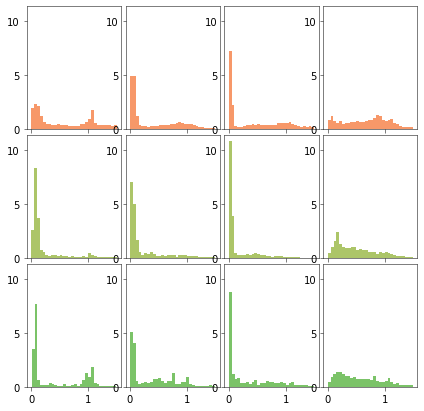

In [50]:
f

In [51]:
f.savefig(outpath + 'radialDistanceDistribution.pdf')